In [34]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
import matplotlib.ticker as ticker

In [23]:
# Download historical data
ticker = 'AAPL'  # replace with your stock's ticker
end_date = datetime.now().strftime('%Y-%m-%d')  # get current date
data = yf.download(ticker, start='2020-01-01', end=end_date)

# Calculate the compound annual growth rate (CAGR)
days = (data.index[-1] - data.index[0]).days
cagr = ((data['Adj Close'][-1] / data['Adj Close'][1]) ** (365.0/days)) - 1

# Calculate the annual volatility of returns
data['Returns'] = data['Adj Close'].pct_change()
vol = data['Returns'].std() * np.sqrt(252)

[*********************100%%**********************]  1 of 1 completed


C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\1212548822.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((data['Adj Close'][-1] / data['Adj Close'][1]) ** (365.0/days)) - 1


In [24]:
# Define the number of simulations and trading days
num_simulations = 10000
num_days = 252

# Create an empty DataFrame to hold the simulation results
sim_df = pd.DataFrame()

# Run the simulations
for x in range(num_simulations):
    count = 0
    daily_returns = np.random.normal(cagr/252, vol/np.sqrt(252), num_days)+1
    
    price_series = [data['Adj Close'][-1]]
    
    for j in daily_returns:
        price_series.append(price_series[count] * j)
        count += 1
        
    sim_df[x] = price_series
    print(sim_df[x])

0      195.710007
1      196.523980
2      197.906479
3      197.036108
4      202.474734
          ...    
248    238.469260
249    240.785755
250    237.519526
251    240.099563
252    242.749442
Name: 0, Length: 253, dtype: float64
0      195.710007
1      194.028769
2      195.787967
3      195.339636
4      199.021894
          ...    
248    272.509458
249    277.110473
250    277.104396
251    281.821829
252    289.652864
Name: 1, Length: 253, dtype: float64
0      195.710007
1      195.453819
2      196.592622
3      204.829151
4      210.797761
          ...    
248    208.263208
249    202.628252
250    204.388810
251    210.516126
252    204.039679
Name: 2, Length: 253, dtype: float64
0      195.710007
1      203.278925
2      206.706087
3      200.093401
4      191.549321
          ...    
248    115.900267
249    114.606366
250    117.312090
251    116.420143
252    113.309596
Name: 3, Length: 253, dtype: float64
0      195.710007
1      204.689477
2      216.787321
3     

C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\2394202825.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_series = [data['Adj Close'][-1]]
C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\2394202825.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_df[x] = price_series


0      195.710007
1      196.830205
2      195.904747
3      202.393358
4      198.691114
          ...    
248    199.615959
249    199.777316
250    195.311584
251    198.015057
252    200.958630
Name: 90, Length: 253, dtype: float64
0      195.710007
1      197.548235
2      191.156507
3      188.122360
4      184.416696
          ...    
248    232.356590
249    236.485540
250    236.422920
251    237.184455
252    231.519010
Name: 91, Length: 253, dtype: float64
0      195.710007
1      193.220857
2      197.171874
3      195.457070
4      188.240584
          ...    
248    256.966493
249    252.142467
250    264.276513
251    265.456284
252    265.836930
Name: 92, Length: 253, dtype: float64
0      195.710007
1      205.448423
2      213.121289
3      211.316347
4      205.368775
          ...    
248    127.676804
249    125.512275
250    122.864940
251    124.595414
252    126.673609
Name: 93, Length: 253, dtype: float64
0      195.710007
1      198.193459
2      198.938353
3 

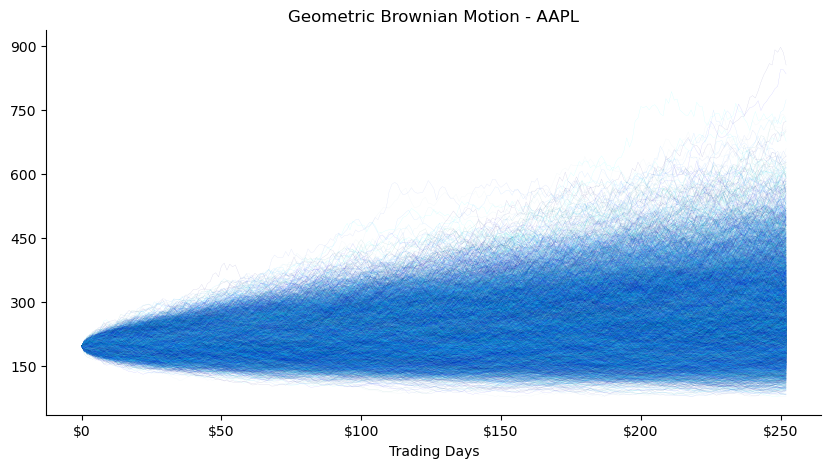

In [41]:
# Plot the first 10 simulations

plt.figure(figsize=(10,5))


colors = ['lightblue', 'skyblue', 'royalblue', 'darkblue', 'cyan', 'teal', 'navy', 'blue', 'dodgerblue', 'deepskyblue']

for i in range(10000):
    plt.plot(sim_df.iloc[:, i], color=colors[i % 10], alpha=0.2, linewidth=0.2)


plt.title('Geometric Brownian Motion - AAPL')
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('$%.0f'))  # add $ to x-axis labels
plt.xlabel('Trading Days')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ay = plt.gca()
ay.yaxis.set_major_locator(ticker.MaxNLocator(nbins=9))
plt.show()


In [26]:
final_prices = sim_df.iloc[-1]
p25 = np.percentile(final_prices, 25)
p50 = np.percentile(final_prices, 50)
p75 = np.percentile(final_prices, 75)
prob_increase = sum(final_prices > data['Adj Close'][-1]) / num_simulations

C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\873153911.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_increase = sum(final_prices > data['Adj Close'][-1]) / num_simulations


In [27]:
last_price = data['Adj Close'][-1]
p25_increase = ((p25 - last_price) / last_price) * 100
p50_increase = ((p50 - last_price) / last_price) * 100
p75_increase = ((p75 - last_price) / last_price) * 100

C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\917470716.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = data['Adj Close'][-1]


In [28]:
print(f"Price now: ${data['Adj Close'][-1]:.2f}")

print(f'25th percentile: ${p25:.2f} ({p25_increase:.2f}%)')
print(f'50th percentile: ${p50:.2f} ({p50_increase:.2f}%)')
print(f'75th percentile: ${p75:.2f} ({p75_increase:.2f}%)')
print(f'Probability of price increase: {prob_increase * 100:.2f}%')

Price now: $195.71
25th percentile: $197.58 (0.96%)
50th percentile: $246.45 (25.93%)
75th percentile: $311.90 (59.37%)
Probability of price increase: 75.92%


C:\Users\caoqu\AppData\Local\Temp\ipykernel_13296\869883258.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Price now: ${data['Adj Close'][-1]:.2f}")
